# Pandas for data manipulation

In this tutorial, we will be inspecting a set of cloud signatures for building a cloud and cloud-shadow mask from a pair of signature files. These were extracted from two seperate images using pyeo.classification.extract_signatures(), with the aim of building a better cloud mask.

In this practical, we will be

* reading the samples from a .csv into Pandas
* inspecting them
* joining them together
* subsampling them
* saving the final output to a new .csv file


## Step 0: import pandas
But before that, we need to **import** Pandas. The convention is to do this in the following form.

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:20,.2f}'.format  # Avoids scientific notation being used for floats

## Step 1: Loading data

Pandas can read from a number of file formats, including
* csv (`pd.read_csv`)
* Excel (`pd.read_excel`)
* HTML (`pd.read_html`)
* HDF5 (`pd.read_hdf`)
* Your clipboard (copy data, then `pd.read_clipboard`)

For this practical, we will be using `pd.read_csv()`. This reads a .csv file into a **Dataframe** - this is the core of Pandas, and almost every function in the library acts on and returns a dataframe.

Run the below cell to see the most basic example of this in action.

In [ ]:
clip = pd.read_clipboard()

In [ ]:
cloud_sigs_T48MWU = pd.read_csv("cloud_sigs_T48MWU.csv")  # Reads the contents of cloud_sigs_T48MWU.csv into a dataframe
cloud_sigs_T48MWU  # Displays the dataframe in the notebook

## Step 2: Labelling data

As you can see, this is sort of a mess of meaningless numbers. The strength of Pandas is it's strong reliance on labels to provide context for the data.

A dataframe is organised into **rows** and **columns**.
* Each **column** is a **variable**.
* Each **row** is an **observation** of those variables.

In the context of this practical:
* each row is a pixel from an image
* the first column
* each column after the first is a band.

When Pyeo extracts signatures, the first column is the class assigned from the shapefile, and all the rest are the bands in the source image. In this case, these are the four 10m-resolution Sentinel-2 bands.

To label a dataframe, pass a list of labels to the 'names' parameter as shown below:


In [ ]:
cloud_headers = ["class", "blue", "green", "red", "ir"]
cloud_sigs_T48MWU = pd.read_csv("cloud_sigs_T48MWU.csv", names=cloud_headers)  
cloud_sigs_T48MWU

You can extact the values for a given column by indexing the dataframe with that cloumns name, as shown:

In [ ]:
cloud_sigs_T48MWU['class']

## Exercise 1
In your notebook, there is another set of signatures extracted from a different image, 'cloud_sigs_T48MXU.csv'

Load this into a pandas dataframe with the same labels as the example.

In [26]:
band_headers = ['class','b','g','r','i']

cloud_sigs_T48MXU = pd.read_csv("cloud_sigs_T48MXU.csv", names=cloud_headers)
cloud_sigs_T48MXU

,class,blue,green,red,ir
0,3.00,435.00,520.00,361.00,"1,806.00"
1,3.00,438.00,522.00,357.00,"1,735.00"
2,3.00,435.00,505.00,359.00,"1,748.00"
3,3.00,456.00,510.00,359.00,"1,547.00"
4,3.00,484.00,539.00,400.00,"1,427.00"
...,...,...,...,...,...
3394421,1.00,650.00,638.00,533.00,384.00
3394422,1.00,668.00,635.00,527.00,416.00
3394423,1.00,642.00,658.00,530.00,399.00
3394424,1.00,637.00,670.00,529.00,383.00


## Step 3: Inspecting data and chaining commands

The Pandas function `DataFrame.describe()` creates a new dataframe with  a set of useful statistics. Run the below cell to see an example.

In [6]:
cloud_sigs_T48MWU.describe()

,class,blue,green,red,ir
count,"4,195,094.00","4,195,094.00","4,195,094.00","4,195,094.00","4,195,094.00"
mean,1.17,773.99,670.02,450.58,462.18
std,0.85,735.58,745.07,762.13,959.87
min,1.00,173.00,230.00,159.00,1.00
25%,1.00,612.00,492.00,317.00,248.00
50%,1.00,668.00,561.00,351.00,282.00
75%,1.00,754.00,629.00,389.00,322.00
max,6.00,"18,355.00","17,368.00","16,680.00","15,900.00"


The Pandas function `DataFrame.groupby` lets you group the items in a dataframe by an attribute.

You can use this to perform functions within discrete classes; for example, the below cell performs descibe() on each class instead of the entire dataset

In [16]:
cloud_sigs_T48MWU.groupby('class').describe()

blue                                            \
                     count                 mean                  std   
class                                                                  
1.00          4,006,069.00               706.10               128.04   
2.00             54,215.00             6,560.88             2,555.24   
3.00              6,143.00               375.82                99.10   
5.00             17,326.00               350.81                42.30   
6.00            111,341.00               486.70               160.36   

                                                                      \
                       min                  25%                  50%   
class                                                                  
1.00                397.00               616.00               670.00   
2.00                758.00             4,506.50             6,519.00   
3.00                173.00               309.00               356.00   
5.00                241.00               319.00               347.00   
6.00                284.00               415.00               441.00   

                                                               green  \
                       75%                  max                count   
class                                                                  
1.00                753.00             2,657.00         4,006,069.00   
2.00              8,321.00            18,355.00            54,215.00   
3.00                441.00               883.00             6,143.00   
5.00                378.00               813.00            17,326.00   
6.00                494.00             2,775.00           111,341.00   

                            ...                  red                       \
                      mean  ...                  75%                  max   
class                       ...                                             
1.00                590.73  ...               384.00             2,029.00   
2.00              6,503.32  ...             8,208.00            16,680.00   
3.00                411.37  ...               358.00               784.00   
5.00                589.78  ...               365.00             1,545.00   
6.00                709.33  ...               610.00             3,338.00   

                        ir                                            \
                     count                 mean                  std   
class                                                                  
1.00          4,006,069.00               284.26                61.04   
2.00             54,215.00             7,175.78             2,231.01   
3.00              6,143.00               951.36               339.70   
5.00             17,326.00             3,581.43               467.56   
6.00            111,341.00             3,082.51               798.34   

                                                                      \
                       min                  25%                  50%   
class                                                                  
1.00                  1.00               246.00               279.00   
2.00                281.00             5,643.00             7,106.00   
3.00                173.00               823.00               985.00   
5.00              1,895.00             3,228.00             3,587.00   
6.00                255.00             2,710.00             3,305.00   

                                                 
                       75%                  max  
class                                            
1.00                314.00             3,671.00  
2.00              8,514.00            15,900.00  
3.00              1,147.00             2,650.00  
5.00              3,959.75             5,000.00  
6.00              3,625.00             5,227.00  

[5 rows x 32 columns]

## Exercise 2
Inspect the data in cloud_sigs_T48MXU.csv using `describe`

In [17]:
cloud_sigs_T48MXU.groupby('class').describe()

blue                                            \
                     count                 mean                  std   
class                                                                  
1.00          3,303,122.00               627.69                88.63   
2.00              8,263.00             4,413.01             1,990.73   
3.00              8,891.00               488.23                97.88   
4.00             48,138.00             1,271.23               513.88   
5.00             26,012.00               389.11                41.03   

                                                                      \
                       min                  25%                  50%   
class                                                                  
1.00                289.00               556.00               626.00   
2.00                861.00             2,751.50             4,164.00   
3.00                316.00               422.00               461.00   
4.00                295.00               896.00             1,215.00   
5.00                259.00               362.00               386.00   

                                                               green  \
                       75%                  max                count   
class                                                                  
1.00                694.00             2,154.00         3,303,122.00   
2.00              6,051.00            10,226.00             8,263.00   
3.00                520.00             1,117.00             8,891.00   
4.00              1,559.00             5,664.00            48,138.00   
5.00                416.00               563.00            26,012.00   

                            ...                  red                       \
                      mean  ...                  75%                  max   
class                       ...                                             
1.00                570.81  ...               418.00             2,222.00   
2.00              4,390.35  ...             5,974.50             9,850.00   
3.00                533.24  ...               468.50             1,097.00   
4.00              1,526.70  ...             2,155.00             6,935.00   
5.00                584.93  ...               407.00               774.00   

                        ir                                            \
                     count                 mean                  std   
class                                                                  
1.00          3,303,122.00               256.96                95.73   
2.00              8,263.00             5,210.01             1,961.82   
3.00              8,891.00             1,138.31               252.51   
4.00             48,138.00             2,242.08               755.94   
5.00             26,012.00             3,125.89               363.04   

                                                                      \
                       min                  25%                  50%   
class                                                                  
1.00                 86.00               182.00               238.00   
2.00              1,219.00             3,552.00             4,838.00   
3.00                511.00               952.00             1,109.00   
4.00                211.00             1,852.00             2,228.00   
5.00              1,930.00             2,859.00             3,157.00   

                                                 
                       75%                  max  
class                                            
1.00                332.00             3,508.00  
2.00              6,916.00            10,507.00  
3.00              1,294.50             2,647.00  
4.00              2,632.00             7,202.00  
5.00              3,382.00             5,226.00  

[5 rows x 32 columns]

## Step 4: Combining data
It will be better to work on a combined dataset, so we don't need to repeat ourselves. You can use the following function to combine a set of datasets together:
```python
dataframe_list = [dataframe_1, dataframe_2]
combined_data = pd.concat(dataframe_list)
```

## Exercise 3: Use pd.concat to join the two dataframes together and inspect the output

In [27]:

full = pd.concat([cloud_sigs_T48MWU, cloud_sigs_T48MXU])

In [28]:
full

,class,blue,green,red,ir
0,1.00,603.00,450.00,305.00,251.00
1,1.00,600.00,464.00,316.00,256.00
2,1.00,613.00,460.00,313.00,255.00
3,1.00,605.00,461.00,305.00,242.00
4,1.00,569.00,473.00,316.00,256.00
...,...,...,...,...,...
3394421,1.00,650.00,638.00,533.00,384.00
3394422,1.00,668.00,635.00,527.00,416.00
3394423,1.00,642.00,658.00,530.00,399.00
3394424,1.00,637.00,670.00,529.00,383.00


## Step 5: Subsampling data
From earlier, we can see that this dataset is very unbalanced. Some machine learning techniques can account for this, but we can also use pandas to randomly sample a dataset.

We do this by creating a function, `sample_class`, that takes a dataframe as an augment and returns a dataframe containing a set of randomly sampled rows from the input.

```python
n_samples_per_class = 50
def sample_class(class_df):
    return class_df.sample(n_samples_per_class)
```
We can then apply this dataframe to each grouping of class with the following line:

```python
subsampled_data = my_dataframe.groupby('class', group_keys=False).apply(sample_class)
```

## Exercise 4: Use the above snippet to create a new dataframe containing 300 samples per class.

In [41]:
def sample_class(class_df):
    return class_df.sample(300)

In [42]:
sample_data = full.groupby('class', group_keys=False).apply(sample_class)
sample_data

,class,blue,green,red,ir
3492598,1.00,750.00,598.00,427.00,384.00
1660032,1.00,563.00,587.00,306.00,190.00
1070653,1.00,803.00,697.00,328.00,244.00
2744410,1.00,680.00,600.00,356.00,290.00
1263735,1.00,787.00,591.00,307.00,229.00
...,...,...,...,...,...
2519640,6.00,441.00,675.00,447.00,"3,446.00"
1707872,6.00,447.00,737.00,432.00,"3,475.00"
2762109,6.00,529.00,799.00,649.00,"3,114.00"
1735354,6.00,401.00,635.00,513.00,"2,830.00"


## Step 6: Save the output to a new csv file

You can write to almost any data format that Pandas can read from, using the `to_[format]` method of a dataframe.

For example
```python
my_dataframe.to_csv("my_data.csv")
```
will write the data in my_dataframe to a csv file called my_data.

**NOTE**: By default, Pandas includes a header with your column titles and an index column. We do not want this for the next step - so we can turn it of by using the following snipped
```python
my_dataframe.to_csv("my_data.csv", index=False, header=False)
```

## Exercise 5: Save your filtered dataset to a .csv and use pyeo.classification.create_model_from_signature to create at new model


In [44]:
sample_data.to_csv("cloud_sigs_subsampled.csv", index=False, header=False)

class
1.00    AxesSubplot(0.125,0.125;0.775x0.755)
2.00    AxesSubplot(0.125,0.125;0.775x0.755)
3.00    AxesSubplot(0.125,0.125;0.775x0.755)
4.00    AxesSubplot(0.125,0.125;0.775x0.755)
5.00    AxesSubplot(0.125,0.125;0.775x0.755)
6.00    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

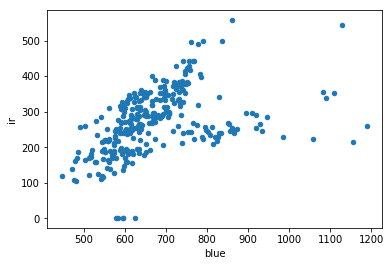

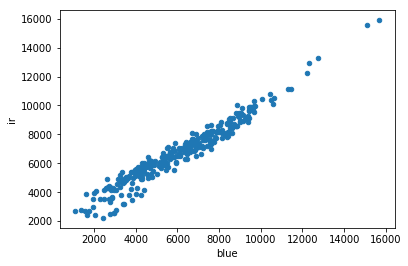

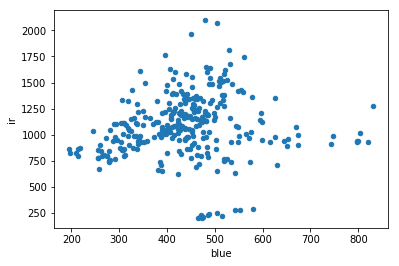

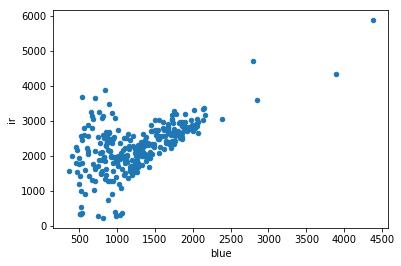

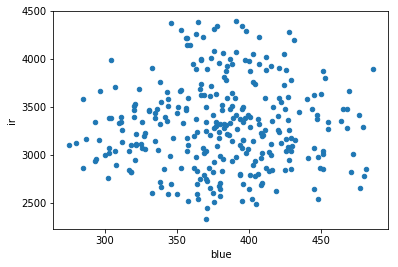

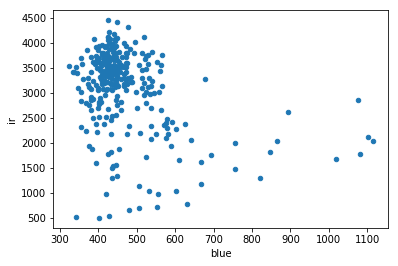

In [49]:
%matplotlib inline
sample_data.groupby('class').plot.scatter(x='blue', y='ir')

https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html
https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf


In [66]:
sample_data['ndvi'] = (sample_data['ir']-sample_data['red'])/(sample_data['ir']+sample_data['red'])
sample_data

,class,blue,green,red,ir,ndvi
3492598,1.00,750.00,598.00,427.00,384.00,-0.05
1660032,1.00,563.00,587.00,306.00,190.00,-0.23
1070653,1.00,803.00,697.00,328.00,244.00,-0.15
2744410,1.00,680.00,600.00,356.00,290.00,-0.10
1263735,1.00,787.00,591.00,307.00,229.00,-0.15
...,...,...,...,...,...,...
2519640,6.00,441.00,675.00,447.00,"3,446.00",0.77
1707872,6.00,447.00,737.00,432.00,"3,475.00",0.78
2762109,6.00,529.00,799.00,649.00,"3,114.00",0.66
1735354,6.00,401.00,635.00,513.00,"2,830.00",0.69


In [ ]:
sample_data.plot.bar()

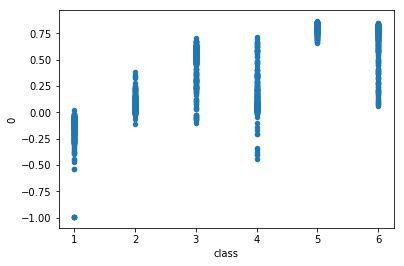

In [56]:
ndvi_frame.plot.scatter(x='class', y=0)

In [ ]:
from pyeo import classification as cls
cls.classify_image("../S2A_MSIL2A_20170922T025541_N0205_R032_T48MWU_20170922T031450.tif", "cloud_model.pkl", "cloud_classes.tif")

In [ ]:
cls.classify_image("../S2A_MSIL2A_20170922T025541_N0205_R032_T48MXU_20170922T031450.tif", "cloud_model.pkl", "cloud_classes_east.tif")


In [ ]:
from pyeo import raster_manipulation as ras
ras.create_mask_from_class_map("cloud_classes_east.tif", "../S2A_MSIL2A_20170922T025541_N0205_R032_T48MXU_20170922T031450.msk", [4,5,6], buffer_size = 2)
ras.create_mask_from_class_map("cloud_classes.tif", "../S2A_MSIL2A_20170922T025541_N0205_R032_T48MWU_20170922T031450.msk", [4,5,6], buffer_size = 2)


In [ ]:
?ras.create_mask_from_class_map